___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100) #columns sayısı
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['figure.figsize'] = [8,5]
# plt.rcParams['font.size'] =14
# plt.rcParams['font.weight']= 'bold'
# plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv("part3_final_scout_not_dummy.csv")

In [4]:
df.head(5).T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.0,80000.0,83450.0,73000.0,16200.0
type,Used,Used,Used,Used,Used
previous_owners,2.0,2.0,1.0,1.0,1.0
inspection_new,1,0,0,0,1
gearing_type,Automatic,Automatic,Automatic,Automatic,Automatic
drive_chain,front,front,front,front,front
fuel,Diesel,Benzine,Diesel,Diesel,Diesel


In [14]:
df.drop(columns="price")

,make_model,body_type,km,type,previous_owners,inspection_new,gearing_type,drive_chain,fuel,co2_emission,extras,gears,age,hp_kW,upholstery_type,displacement_cc,weight_kg,comb_consumption,comfort_convenience_package,entertainment_media_package,safety_security_package
0,Audi A1,Sedans,56013.000000,Used,2.0,1,Automatic,front,Diesel,99.0,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,66.0,Cloth,1422.0,1220.0,3.8,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,80000.000000,Used,2.0,0,Automatic,front,Benzine,129.0,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,141.0,Cloth,1798.0,1255.0,5.6,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,83450.000000,Used,1.0,0,Automatic,front,Diesel,99.0,"Alloy wheels, Voice Control",7.0,3.0,85.0,Cloth,1598.0,1135.0,3.8,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,73000.000000,Used,1.0,0,Automatic,front,Diesel,99.0,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,66.0,Cloth,1422.0,1195.0,3.8,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16200.000000,Used,1.0,1,Automatic,front,Diesel,109.0,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,66.0,Cloth,1422.0,1135.0,4.1,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,Renault Espace,Van,1647.362609,New,1.0,0,Automatic,front,Diesel,139.0,"Alloy wheels, Touch screen",6.0,0.0,147.0,Part/Full Leather,1997.0,1758.0,5.3,Premium,Plus,Safety Premium Package
15905,Renault Espace,Van,9900.000000,Used,1.0,1,Automatic,front,Benzine,168.0,"Alloy wheels, Touch screen, Voice Control",7.0,0.0,165.0,Cloth,1798.0,1708.0,7.4,Premium,Plus,Safety Premium Package
15906,Renault Espace,Van,15.000000,Pre-registered,1.0,1,Automatic,front,Diesel,139.0,Alloy wheels,6.0,0.0,146.0,Part/Full Leather,1997.0,1734.0,5.3,Standard,Plus,Safety Premium Package
15907,Renault Espace,Van,10.000000,Pre-registered,1.0,0,Automatic,front,Diesel,139.0,"Alloy wheels, Touch screen",6.0,0.0,147.0,Part/Full Leather,1997.0,1758.0,5.3,Standard,Plus,Safety Premium Package


In [21]:
df = pd.concat([df.drop(columns="price"), df["price"]], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   km                           15909 non-null  float64
 3   type                         15909 non-null  object 
 4   previous_owners              15909 non-null  float64
 5   inspection_new               15909 non-null  int64  
 6   gearing_type                 15909 non-null  object 
 7   drive_chain                  15909 non-null  object 
 8   fuel                         15909 non-null  object 
 9   co2_emission                 15909 non-null  float64
 10  extras                       15909 non-null  object 
 11  gears                        15909 non-null  float64
 12  age                          15909 non-null  float64
 13  hp_kW           

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km,15909.0,32092.436526,36982.838757,0.0,1913.0,20410.0,46900.0,317000.0
previous_owners,15909.0,1.007857,0.367974,0.0,1.0,1.0,1.0,4.0
inspection_new,15909.0,0.344145,0.475104,0.0,0.0,0.0,1.0,1.0
co2_emission,15909.0,117.782984,18.022889,45.0,104.0,117.0,129.0,253.0
gears,15909.0,5.937268,0.704675,5.0,5.0,6.0,6.0,8.0
age,15909.0,1.389591,1.121355,0.0,0.0,1.0,2.0,3.0
hp_kW,15909.0,88.493746,26.671943,40.0,66.0,85.0,103.0,294.0
displacement_cc,15909.0,1428.657364,275.852413,890.0,1229.0,1461.0,1598.0,2967.0
weight_kg,15909.0,1337.675467,199.672043,840.0,1165.0,1295.0,1472.0,2471.0
comb_consumption,15909.0,4.824329,0.887890,3.0,4.0,4.8,5.4,9.1


<AxesSubplot:>

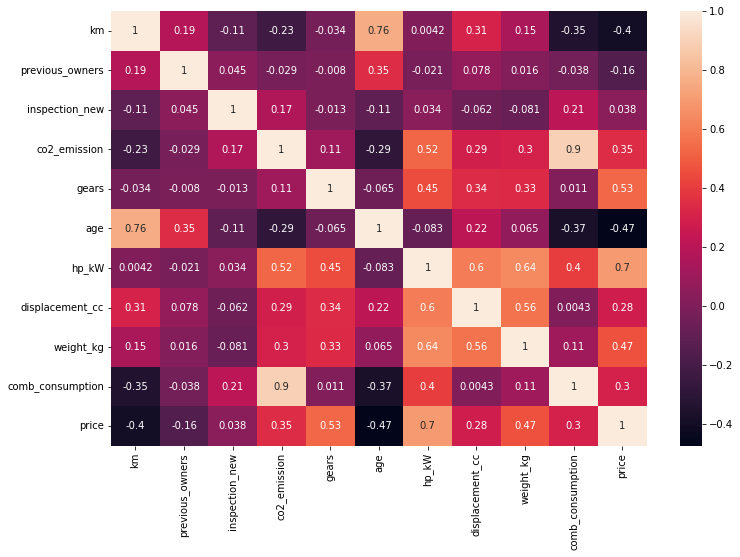

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [27]:
df[df.select_dtypes('object').columns].head().T


,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
type,Used,Used,Used,Used,Used
gearing_type,Automatic,Automatic,Automatic,Automatic,Automatic
drive_chain,front,front,front,front,front
fuel,Diesel,Benzine,Diesel,Diesel,Diesel
extras,"Alloy wheels, Catalytic Converter, Voice Control","Alloy wheels, Sport seats, Sport suspension, V...","Alloy wheels, Voice Control","Alloy wheels, Sport seats, Voice Control","Alloy wheels, Sport package, Sport suspension,..."
upholstery_type,Cloth,Cloth,Cloth,Cloth,Cloth
comfort_convenience_package,Premium,Standard,Premium,Standard,Premium
entertainment_media_package,Plus,Plus,Standard,Plus,Plus


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

### Converting the Extras feature from object to numeric

In [28]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [29]:
df["extras"].value_counts()

1     7009
2     3391
3     2684
4     1404
5      743
6      409
7      174
8       60
9       28
10       7
Name: extras, dtype: int64

## multicollinearity control

In [31]:
def color_red(val):
    
    if (val > 0.80 and val < 1) or (val < -0.80 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,km,previous_owners,inspection_new,co2_emission,extras,gears,age,hp_kW,displacement_cc,weight_kg,comb_consumption,price
km,1.000000,0.185958,-0.111360,-0.227643,0.018517,-0.033823,0.758370,0.004170,0.306792,0.147246,-0.345228,-0.399443
previous_owners,0.185958,1.000000,0.044580,-0.029036,0.040446,-0.008038,0.347237,-0.020520,0.078121,0.016488,-0.038152,-0.159027
inspection_new,-0.111360,0.044580,1.000000,0.168983,0.152879,-0.012870,-0.110088,0.034327,-0.061677,-0.080866,0.207112,0.038432
co2_emission,-0.227643,-0.029036,0.168983,1.000000,0.225945,0.106238,-0.288244,0.522774,0.288524,0.298420,0.896207,0.347669
extras,0.018517,0.040446,0.152879,0.225945,1.000000,0.225042,-0.025736,0.354481,0.215360,0.149501,0.178099,0.251408
gears,-0.033823,-0.008038,-0.012870,0.106238,0.225042,1.000000,-0.064770,0.449727,0.339270,0.333763,0.011110,0.530879
age,0.758370,0.347237,-0.110088,-0.288244,-0.025736,-0.064770,1.000000,-0.083334,0.215304,0.065081,-0.371941,-0.473689
hp_kW,0.004170,-0.020520,0.034327,0.522774,0.354481,0.449727,-0.083334,1.000000,0.597708,0.638395,0.403492,0.696532
displacement_cc,0.306792,0.078121,-0.061677,0.288524,0.215360,0.339270,0.215304,0.597708,1.000000,0.563594,0.004314,0.282075
weight_kg,0.147246,0.016488,-0.080866,0.298420,0.149501,0.333763,0.065081,0.638395,0.563594,1.000000,0.105840,0.468264


In [ ]:
# comb_consumption	vs co2_emission

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [32]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.select_dtypes('object').value_counts()

make_model  body_type    type            gearing_type    drive_chain  fuel     upholstery_type    comfort_convenience_package  entertainment_media_package  safety_security_package
Opel Corsa  Compact      Used            Manual          front        Benzine  Cloth              Standard                     Plus                         Safety Premium Package     193
Audi A3     Sedans       Used            Manual          front        Diesel   Cloth              Standard                     Plus                         Safety Premium Package     185
                                         Automatic       front        Diesel   Cloth              Standard                     Plus                         Safety Premium Package     154
Opel Corsa  Compact      Used            Automatic       front        Benzine  Cloth              Premium                      Plus                         Safety Premium Package     140
Audi A1     Sedans       Used            Manual          front        Di

In [49]:
X_train.select_dtypes('object').head().T

,14291,10944,2582,14038,12550
make_model,Renault Clio,Opel Insignia,Audi A1,Renault Clio,Opel Insignia
body_type,Sedans,Station wagon,Sedans,Compact,Station wagon
type,Pre-registered,Used,Pre-registered,New,New
gearing_type,Manual,Manual,Manual,Automatic,Automatic
drive_chain,front,front,front,front,front
fuel,Benzine,Diesel,Benzine,Diesel,Diesel
upholstery_type,Cloth,Cloth,Cloth,Cloth,Part/Full Leather
comfort_convenience_package,Standard,Premium,Standard,Standard,Standard
entertainment_media_package,Plus,Plus,Plus,Plus,Plus
safety_security_package,Safety Premium Package,Safety Premium Package,Safety Premium Package,Safety Premium Package,Safety Premium Package


In [64]:
X_train.select_dtypes('object').columns

Index(['make_model', 'body_type', 'type', 'gearing_type', 'drive_chain',
       'fuel', 'upholstery_type', 'comfort_convenience_package',
       'entertainment_media_package', 'safety_security_package'],
      dtype='object')

### OneHotEncoder  and OrdinalEncoder for X_train

### OneHotEncoder

- Convert nominal categoric features

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)#.set_output(transform="pandas")

In [65]:
for i in X_train.select_dtypes('object').columns:
    if X_train[f"{i}"].value_counts().count() <= 2:
        print(i)

upholstery_type
entertainment_media_package


In [66]:
cat_features  = ['make_model', 'body_type', 'type', 'gearing_type', 'drive_chain','fuel',  'upholstery_type',"entertainment_media_package"]
ord_features = ["comfort_convenience_package", "safety_security_package"]

In [68]:
X_train_onehot = pd.DataFrame(ohe.fit_transform(X_train[cat_features]), 
                              columns = ohe.get_feature_names_out(cat_features ), index = X_train.index)
X_train_onehot.head(2).T

,14291,10944
make_model_Audi A1,0.0,0.0
make_model_Audi A3,0.0,0.0
make_model_Opel Astra,0.0,0.0
make_model_Opel Corsa,0.0,0.0
make_model_Opel Insignia,0.0,1.0
make_model_Renault Clio,1.0,0.0
make_model_Renault Duster,0.0,0.0
make_model_Renault Espace,0.0,0.0
body_type_Compact,0.0,0.0
body_type_Convertible,0.0,0.0


In [69]:
X_test_onehot = pd.DataFrame(ohe.fit_transform(X_test[cat_features]), 
                              columns = ohe.get_feature_names_out(cat_features ), index = X_test.index)


### OrdinalEncoder
- Convert ordinal categoric features

In [70]:
ord_features

['comfort_convenience_package', 'safety_security_package']

### comfort_convenience_package

In [71]:
from sklearn.preprocessing import OrdinalEncoder

CC_categories = ['Standard','Premium','Premium Plus']

oe = OrdinalEncoder(categories= [CC_categories])

In [77]:
X_train_ord_cc = pd.DataFrame(oe.fit_transform(X_train[["comfort_convenience_package"]]), 
                              columns = ["cc_ordinal"], index = X_train.index)
X_train_ord_cc.value_counts()

cc_ordinal
0.0           8617
1.0           4037
2.0             73
dtype: int64

In [78]:
X_test_ord_cc = pd.DataFrame(oe.transform(X_test[["comfort_convenience_package"]]),
                             columns = ["cc_ordinal"], index = X_test.index)

In [80]:
X_test.comfort_convenience_package.value_counts()

Standard        2161
Premium         1006
Premium Plus      15
Name: comfort_convenience_package, dtype: int64

In [81]:
X_test_ord_cc.value_counts()

cc_ordinal
0.0           2161
1.0           1006
2.0             15
dtype: int64

### safety_security_package

In [82]:
df.safety_security_package.value_counts().index

Index(['Safety Premium Package', 'Safety Premium Plus Package',
       'Safety Standard Package'],
      dtype='object')

In [83]:
SS_categories = ['Safety Standard Package','Safety Premium Package', 'Safety Premium Plus Package']

oe = OrdinalEncoder(categories= [SS_categories])

In [84]:
X_train_ord_ss = pd.DataFrame(oe.fit_transform(X_train[["safety_security_package"]]), 
                              columns = ["ss_ordinal"], index = X_train.index)
X_train_ord_ss.value_counts()

ss_ordinal
1.0           11696
2.0             630
0.0             401
dtype: int64

In [85]:
X_test_ord_ss = pd.DataFrame(oe.transform(X_test[["safety_security_package"]]),
                             columns = ["ss_ordinal"], index = X_test.index)
X_test_ord_ss.value_counts()

ss_ordinal
1.0           2916
2.0            168
0.0             98
dtype: int64

## Concat 

In [87]:
X_train.select_dtypes('number')

,km,previous_owners,inspection_new,co2_emission,extras,gears,age,hp_kW,displacement_cc,weight_kg,comb_consumption
14291,9.0,1.0,0,118.0,1,5.0,0.0,56.0,898.0,1200.0,5.2
10944,72000.0,1.0,1,103.0,3,6.0,3.0,100.0,1598.0,1487.0,3.9
2582,500.0,1.0,0,108.0,4,5.0,0.0,85.0,999.0,1136.0,4.8
14038,10.0,1.0,0,85.0,1,6.0,0.0,56.0,1197.0,1087.0,3.3
12550,10.0,0.0,0,139.0,2,8.0,0.0,125.0,1956.0,1633.0,5.3
...,...,...,...,...,...,...,...,...,...,...,...
13418,20971.0,1.0,0,85.0,1,5.0,2.0,55.0,1461.0,1209.0,3.3
5390,3000.0,1.0,1,117.0,4,6.0,0.0,85.0,999.0,1360.0,5.1
860,14405.0,1.0,0,104.0,1,7.0,1.0,66.0,1422.0,1220.0,4.0
15795,1000.0,2.0,0,120.0,1,6.0,0.0,147.0,1598.0,1621.0,4.7


In [89]:
X_train = pd.concat([X_train.select_dtypes('number'), X_train_onehot, X_train_ord_cc, X_train_ord_ss], axis=1)

In [90]:
X_test = pd.concat([X_test.select_dtypes('number'), X_test_onehot, X_test_ord_cc, X_test_ord_ss], axis=1)

In [91]:
X_train

,km,previous_owners,inspection_new,co2_emission,extras,gears,age,hp_kW,displacement_cc,weight_kg,comb_consumption,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_Benzine,fuel_Diesel,fuel_LPG/CNG,upholstery_type_Cloth,upholstery_type_Part/Full Leather,entertainment_media_package_Plus,entertainment_media_package_Standard,cc_ordinal,ss_ordinal
14291,9.0,1.0,0,118.0,1,5.0,0.0,56.0,898.0,1200.0,5.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10944,72000.0,1.0,1,103.0,3,6.0,3.0,100.0,1598.0,1487.0,3.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2582,500.0,1.0,0,108.0,4,5.0,0.0,85.0,999.0,1136.0,4.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
14038,10.0,1.0,0,85.0,1,6.0,0.0,56.0,1197.0,1087.0,3.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
12550,10.0,0.0,0,139.0,2,8.0,0.0,125.0,1956.0,1633.0,5.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,20971.0,1.0,0,85.0,1,5.0,2.0,55.0,1461.0,1209.0,3.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5390,3000.0,1.0,1,117.0,4,6.0,0.0,85.0,999.0,1360.0,5.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
860,14405.0,1.0,0,104.0,1,7.0,1.0,66.0,1422.0,1220.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
15795,1000.0,2.0,0,120.0,1,6.0,0.0,147.0,1598.0,1621.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [95]:
from sklearn.linear_model import LinearRegression

In [128]:
lm = LinearRegression()

In [129]:
lm.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [132]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [133]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,8.692475e-01,8.642526e-01
mae,1.850045e+03,1.861476e+03
mse,7.080569e+06,7.532381e+06
rmse,2.660934e+03,2.744518e+03


In [117]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'white'
    return f'color: {color}'
pd.DataFrame(X_train).corr().style.applymap(color_red)

,km,previous_owners,inspection_new,co2_emission,extras,gears,age,hp_kW,displacement_cc,weight_kg,comb_consumption,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_Benzine,fuel_Diesel,fuel_LPG/CNG,upholstery_type_Cloth,upholstery_type_Part/Full Leather,entertainment_media_package_Plus,entertainment_media_package_Standard,cc_ordinal,ss_ordinal
km,1.000000,0.182168,-0.109893,-0.226285,0.020844,-0.035098,0.757702,0.005770,0.312108,0.145126,-0.344878,-0.123903,0.086027,0.050172,-0.076316,0.074621,-0.028922,-0.037581,0.013301,-0.125316,-0.003464,-0.005212,-0.021964,-0.042965,0.171558,0.046473,-0.011323,-0.168335,-0.087315,-0.288787,-0.259795,0.476105,-0.101696,0.088736,0.037336,-0.010092,0.009580,0.002976,-0.437428,0.432862,0.037183,-0.032449,0.032449,-0.106247,0.106247,-0.085673,-0.007714
previous_owners,0.182168,1.000000,0.048364,-0.026607,0.044388,-0.008486,0.348746,-0.021923,0.079286,0.015863,-0.036464,-0.013766,-0.008160,0.006950,0.050745,-0.046427,-0.006417,-0.044297,0.039658,-0.001145,0.013510,-0.000987,-0.044885,-0.017761,0.009950,0.017542,0.028373,-0.008257,0.010641,-0.441716,-0.070419,0.335055,0.048674,-0.055244,0.019837,-0.039670,0.039341,-0.000356,-0.062492,0.066574,-0.030988,-0.010283,0.010283,-0.020043,0.020043,0.021285,-0.020204
inspection_new,-0.109893,0.048364,1.000000,0.170885,0.151084,-0.016664,-0.108387,0.031078,-0.064973,-0.086315,0.210259,0.060095,-0.102136,0.056734,0.077004,0.014052,-0.066491,-0.032350,-0.047668,0.125323,-0.011197,-0.019368,-0.040137,-0.112846,0.047948,-0.050091,-0.031929,0.123687,-0.000038,-0.046969,0.077167,-0.074338,0.085893,-0.050787,-0.102859,-0.009256,0.009230,-0.000445,0.201394,-0.195979,-0.042520,0.035677,-0.035677,0.221875,-0.221875,0.247317,-0.025853
co2_emission,-0.226285,-0.026607,0.170885,1.000000,0.219475,0.106921,-0.286348,0.525219,0.287335,0.307632,0.898435,-0.338711,-0.244308,-0.056128,0.215552,0.435060,-0.155863,0.154354,0.207138,-0.013143,0.006204,-0.011129,0.136811,-0.272841,0.219940,-0.034142,0.198829,0.147409,-0.022678,0.137968,0.109837,-0.216567,0.293861,-0.276365,-0.048975,0.242442,-0.242783,0.019026,0.329475,-0.322123,-0.058011,-0.245955,0.245955,0.164735,-0.164735,0.244942,-0.046464
extras,0.020844,0.044388,0.151084,0.219475,1.000000,0.225206,-0.023552,0.352969,0.209945,0.147688,0.173815,0.034210,-0.005003,0.014442,-0.157166,0.244635,-0.133347,-0.036655,-0.034773,-0.123010,0.004294,-0.017971,0.004628,-0.089126,0.249459,-0.022085,-0.041149,0.044091,0.075476,-0.010516,-0.058571,-0.018289,0.207136,-0.219408,0.038117,0.080119,-0.080428,0.007690,-0.023568,0.024446,-0.006611,-0.225224,0.225224,0.347639,-0.347639,0.376494,-0.010674
gears,-0.035098,-0.008486,-0.016664,0.106921,0.225206,1.000000,-0.065730,0.447155,0.335141,0.332248,0.013278,0.014471,0.385778,-0.056376,-0.329232,0.142365,-0.295254,0.003949,0.071679,-0.179793,0.015864,-0.017172,0.003347,0.055995,0.079495,-0.034985,0.062564,0.033199,0.019405,0.042760,0.005990,-0.058130,0.580644,-0.621735,0.126594,0.098650,-0.097899,0.001367,-0.206904,0.204271,0.021218,-0.221949,0.221949,0.089093,-0.089093,0.220555,0.004464
age,0.757702,0.348746,-0.108387,-0.286348,-0.023552,-0.065730,1.000000,-0.083090,0.219594,0.063432,-0.370514,-0.021430,0.040031,-0.011323,-0.049963,0.009767,0.020952,-0.055180,0.022869,-0.077340,0.008291,0.018024,-0.042218,0.003775,0.065515,0.062769,-0.007518,-0.233709,-0.090051,-0.424075,-0.340941,0.647930,-0.090984,0.062156,0.084275,-0.060039,0.058310,0.008291,-0.365498,0.363669,0.015839,-0.009739,0.009739,-0.116610,0.116610,-0

## Cross Validate

In [134]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [135]:
from sklearn.model_selection import cross_validate, cross_val_score


In [136]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [123]:
# scores 

In [137]:
pd.DataFrame(scores, index = range(1,11))


,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.040138,0.003978,0.858763,0.870405,-1929.312868,-1836.727231,-8.272299e+06,-6.952220e+06,-2876.160443,-2636.706312
2,0.056242,0.004031,0.871883,0.868877,-1881.585599,-1843.294270,-7.230300e+06,-7.067383e+06,-2688.921648,-2658.455069
3,0.072090,0.003913,0.871276,0.868901,-1840.313571,-1854.002965,-7.064392e+06,-7.088363e+06,-2657.892338,-2662.397916
4,0.052005,0.004007,0.876157,0.868447,-1854.939613,-1852.055750,-6.456463e+06,-7.153392e+06,-2540.957102,-2674.582562
5,0.063977,0.000000,0.857001,0.870353,-1842.814609,-1854.870723,-6.808044e+06,-7.114569e+06,-2609.222839,-2667.314867
6,0.064274,0.003999,0.870998,0.868999,-1783.615669,-1861.569555,-6.466975e+06,-7.151745e+06,-2543.024817,-2674.274675
7,0.047985,0.003994,0.868491,0.869265,-1872.404510,-1853.174636,-6.638193e+06,-7.132858e+06,-2576.469089,-2670.741017
8,0.064535,0.003993,0.861195,0.870140,-1943.948681,-1839.530185,-8.160065e+06,-6.965340e+06,-2856.582684,-2639.193014
9,0.060122,0.008016,0.876090,0.868325,-1832.433647,-1849.157038,-7.423512e+06,-7.046084e+06,-2724.612284,-2654.446136
10,0.080005,0.003996,0.866854,0.869405,-1790.331511,-1853.377022,-6.967479e+06,-7.098393e+06,-2639.598185,-2664.280885


In [138]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              8.678708e-01
train_r2                             8.693116e-01
test_neg_mean_absolute_error        -1.857170e+03
train_neg_mean_absolute_error       -1.849776e+03
test_neg_mean_squared_error         -7.148772e+06
train_neg_mean_squared_error        -7.077035e+06
test_neg_root_mean_squared_error    -2.671344e+03
train_neg_root_mean_squared_error   -2.660239e+03
dtype: float64

In [139]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [140]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,8.692475e-01,8.642526e-01
mae,1.850045e+03,1.861476e+03
mse,7.080569e+06,7.532381e+06
rmse,2.660934e+03,2.744518e+03


## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [217]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

## Pipeline
- Read the documentation and apply pipeline 
- link : https://scikit-learn.org/stable/modules/compose.html

## Comparing Train and Test Set Scores with Pipeline

## Cross Validate With Pipeline

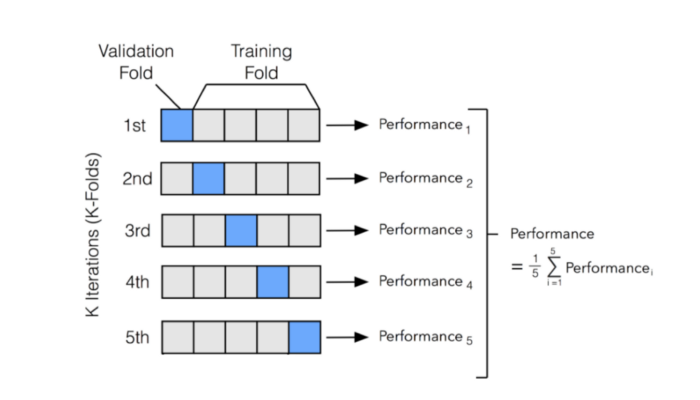

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___